<a href="https://colab.research.google.com/github/khushidubeyokok/AI-ML/blob/main/05_CompterVision/02_OpenCVipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Continuation of OpenCV

## Edge detection and thresholding

- Thresholding is like turning a grayscale image into a simple black-and-white mask by setting a cutoff value—pixels brighter than the threshold become white (255) and darker ones become black (0), making it useful for separating objects from the background (done with `cv2.threshold()` or adaptive methods).
- Edge detection, on the other hand, looks for places where pixel intensity changes sharply, which usually means object boundaries—OpenCV does this with operators like **Sobel** (gradients), Laplacian (second derivatives), and especially **Canny** (a multi-step method involving gradient, non-maximum suppression, and hysteresis thresholding), which highlights edges cleanly.

### Sobel edge detection
- Sobel edge detection is just convolution like blur/sharpen, but with special kernels that approximate derivatives.
- The X kernel measures intensity changes left↔right, so it highlights vertical edges; the Y kernel measures top↔bottom changes, so it highlights horizontal edges.
- Flat regions give near-zero values, while sharp changes produce high positive/negative values (edges).
- The output pixel values represent gradient strength.

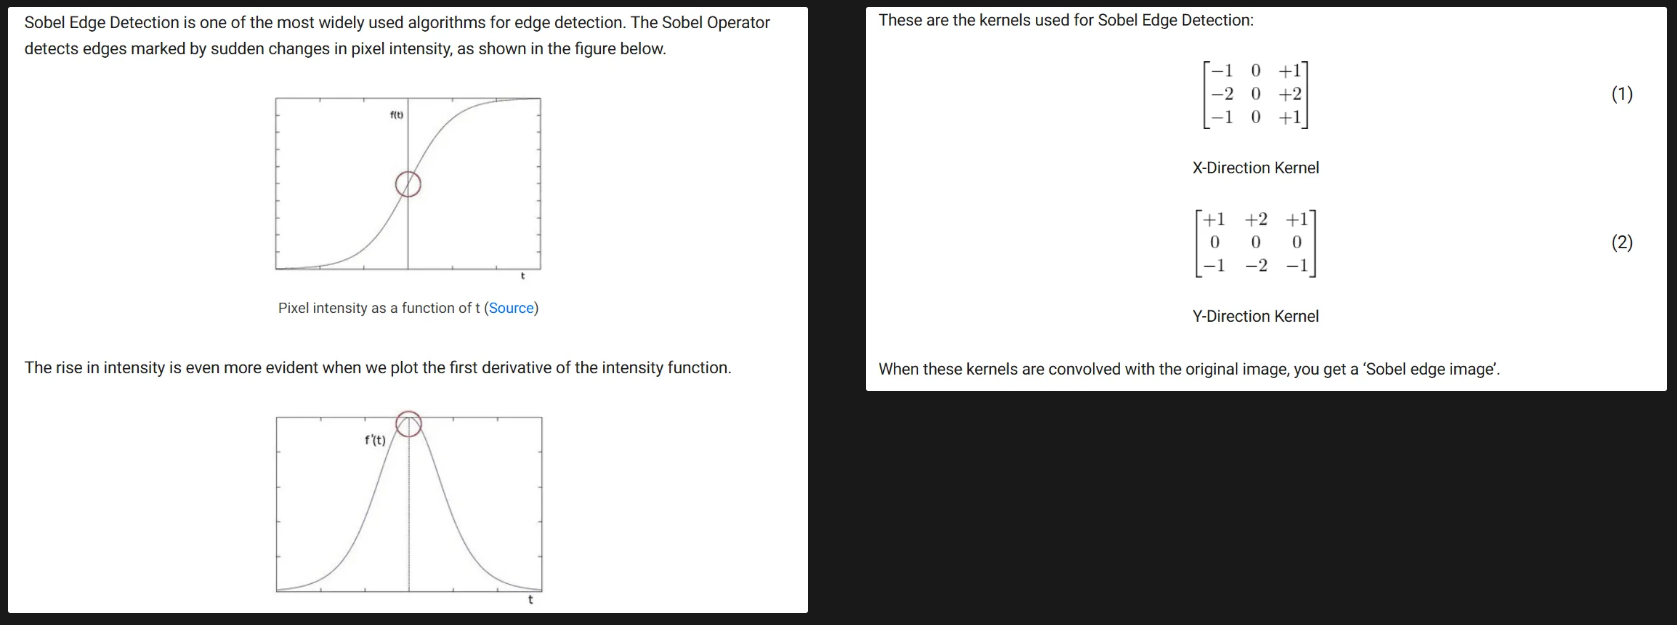

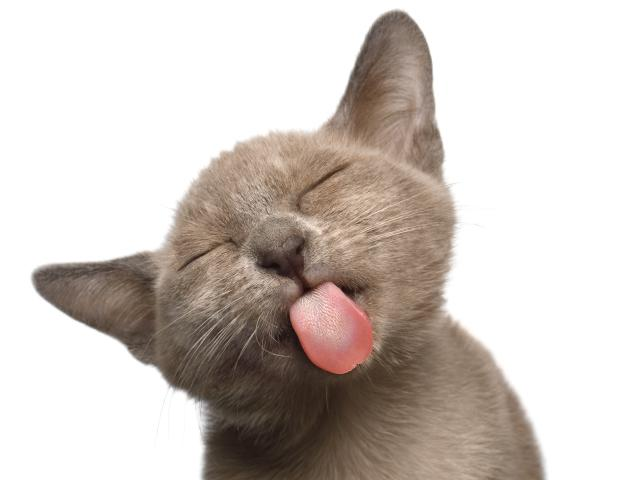

In [443]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/Sample-Collection-Box-Cat-640px.jpg')
cv2_imshow(img)

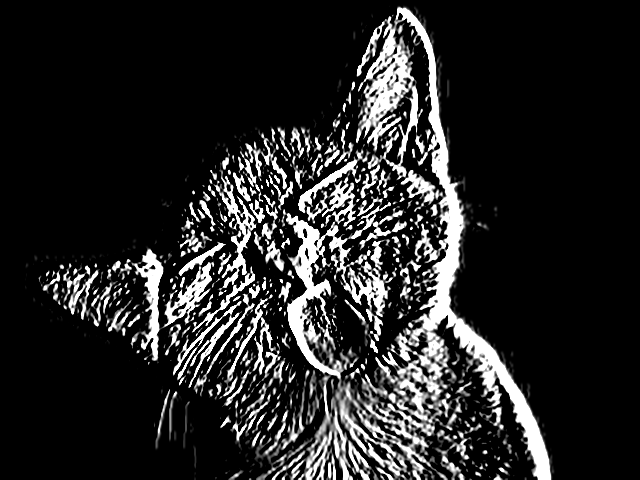

In [444]:
# Convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)

# Sobel Edge Detection
sobelx = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=5)  # X axis

cv2_imshow(sobelx)

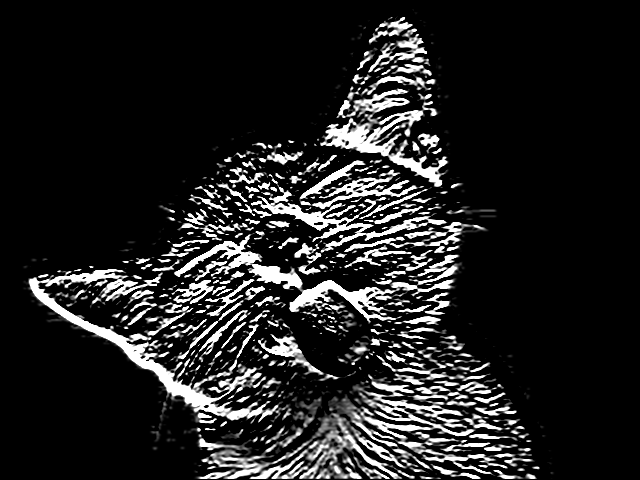

In [445]:
sobely = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=5)  # Y axis
cv2_imshow(sobely)

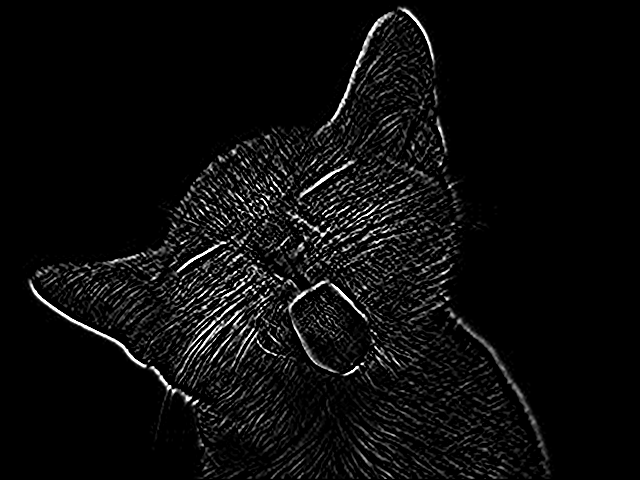

In [446]:
sobelxy = cv2.Sobel(img_blur, cv2.CV_64F, 1, 1, ksize=5) # XY combined
cv2_imshow(sobelxy)

### Canny edge detection is a 4 step pipeline

1. **Noise Reduction** → Gaussian Blur to smooth out random noise.
2. **Calculating the Intensity Gradient of the Image** → Sobel filters to get gradient magnitude (edge strength) and direction.
3. **Suppression of False Edges** → Non-maximum suppression, thinning out edges and removing those not aligned with the gradient direction.
4. **Hysteresis Thresholding** → Double thresholds (high + low) + connectivity check, keeping only strong edges and weak ones connected to them.





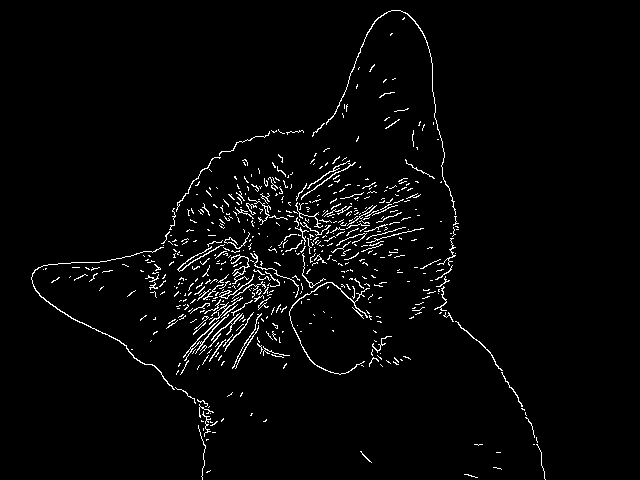

In [447]:
edges = cv2.Canny(img_blur, 80, 100)
cv2_imshow(edges)

### Thresholding

Here’s a list of thresholding methods in OpenCV

1. **THRESH\_BINARY** → pixel > threshold → maxVal, else 0.
2. **THRESH\_BINARY\_INV** → inverse of binary.
3. **THRESH\_TRUNC** → pixel > threshold → set to threshold, else unchanged.
4. **THRESH\_TOZERO** → pixel > threshold → keep pixel, else 0.
5. **THRESH\_TOZERO\_INV** → inverse of tozero.
6. **Adaptive Threshold** → computes threshold for small regions, good for uneven lighting.




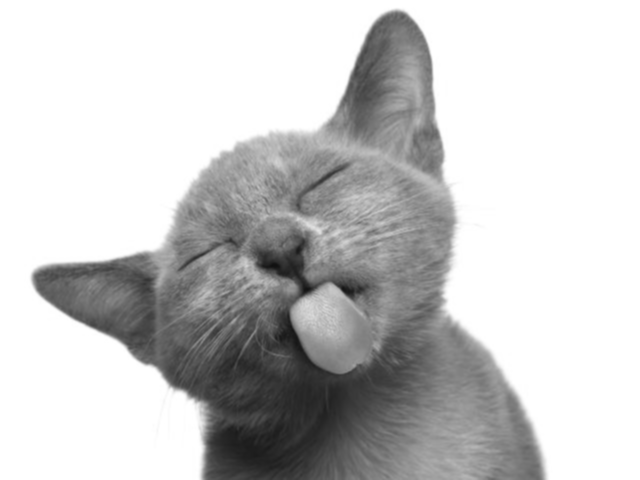

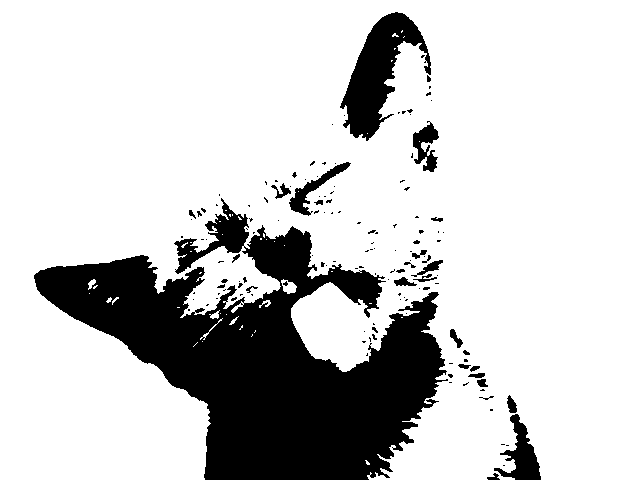

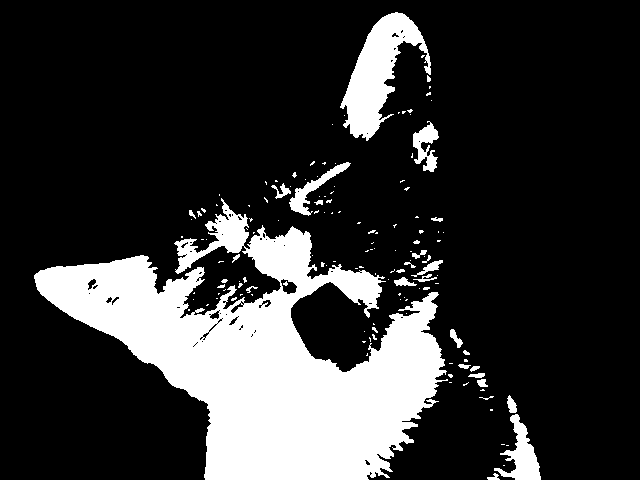

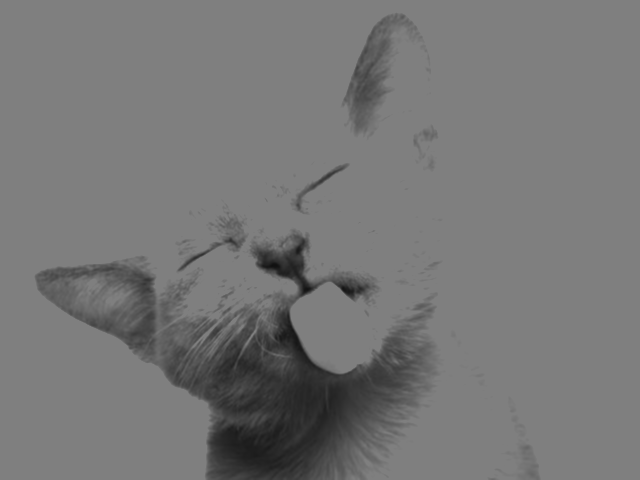

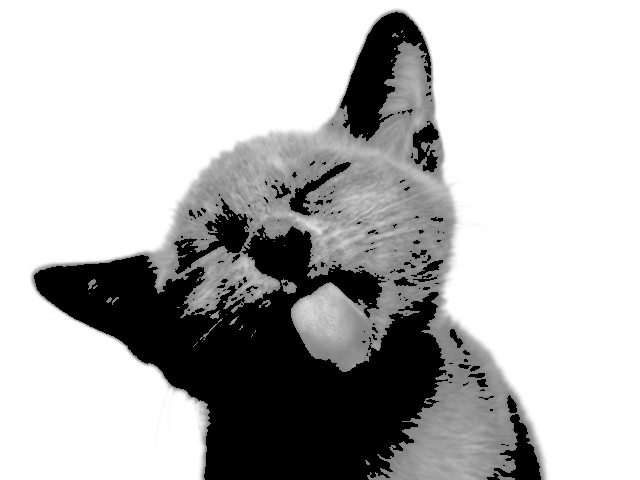

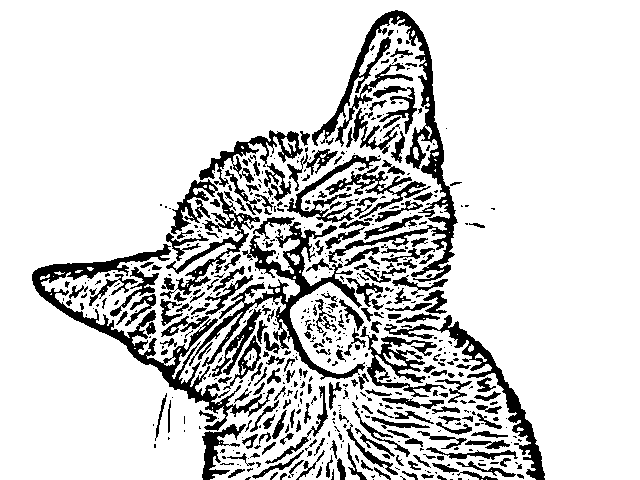

In [448]:
# 1. Simple Binary Threshold
_, thresh_binary = cv2.threshold(img_blur, 127, 255, cv2.THRESH_BINARY)

# 2. Inverse Binary Threshold
_, thresh_binary_inv = cv2.threshold(img_blur, 127, 255, cv2.THRESH_BINARY_INV)

# 3. Truncate Threshold
_, thresh_trunc = cv2.threshold(img_blur, 127, 255, cv2.THRESH_TRUNC)

# 4. ToZero Threshold
_, thresh_tozero = cv2.threshold(img_blur, 127, 255, cv2.THRESH_TOZERO)

# 5. Adaptive Threshold (handles varying lighting)
thresh_adaptive = cv2.adaptiveThreshold(img_blur, 255,
                                        cv2.ADAPTIVE_THRESH_MEAN_C,
                                        cv2.THRESH_BINARY,
                                        11, 2)

# Display results
cv2_imshow(img_blur)
cv2_imshow(thresh_binary)
cv2_imshow(thresh_binary_inv)
cv2_imshow(thresh_trunc)
cv2_imshow(thresh_tozero)
cv2_imshow(thresh_adaptive)

### Bitwise Operations

They work just like logical operations on binary data, but applied pixel-by-pixel.

The main ones:

1. **cv2.bitwise\_and(src1, src2, mask=None)**

   * Keeps only the regions where both images (or image + mask) have non-zero pixels.
   * Used a lot for masking (extracting part of an image).

2. **cv2.bitwise\_or(src1, src2, mask=None)**

   * Keeps pixels that are non-zero in either image.

3. **cv2.bitwise\_xor(src1, src2, mask=None)**

   * Keeps pixels that are non-zero in exactly one image (excludes overlaps).

4. **cv2.bitwise\_not(src)**

   * Inverts every pixel value (black → white, white → black).


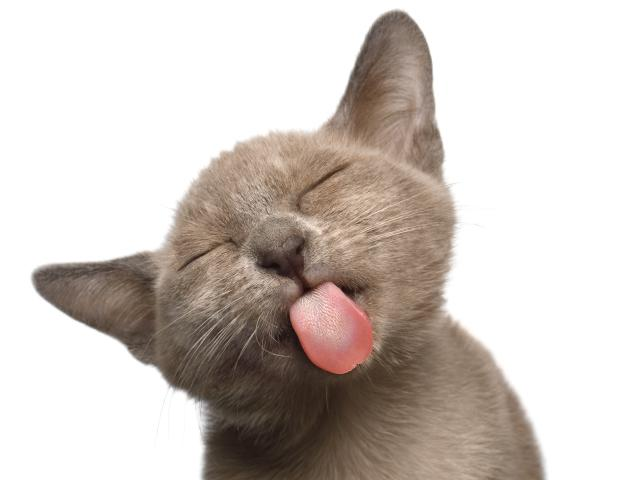

In [449]:
import numpy as np
cv2_imshow(img)

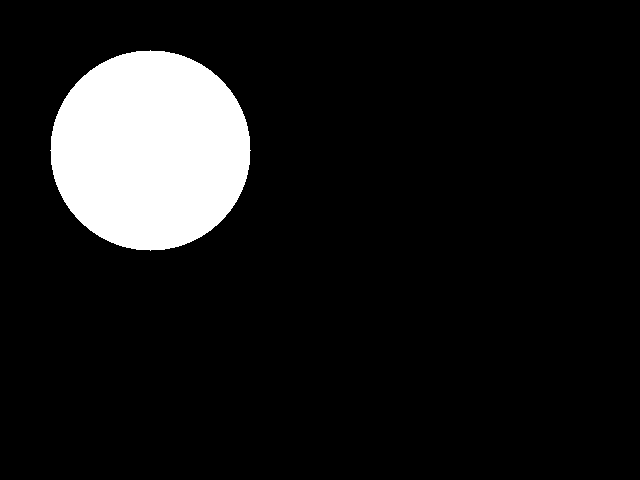

In [450]:
# Create a mask (white circle on black background)
mask = np.zeros(img.shape[:2], dtype="uint8")
cv2.circle(mask, (150,150), 100, 255, -1)

cv2_imshow(mask)

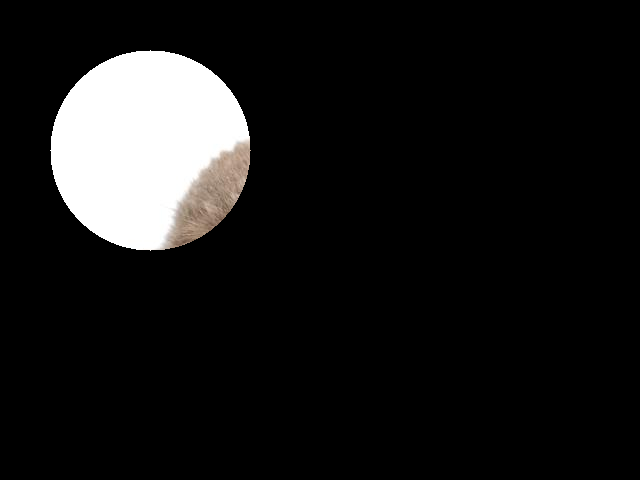

In [451]:
# Apply mask
masked_img = cv2.bitwise_and(img, img, mask=mask)

cv2_imshow(masked_img)  # Only circle area from original remains

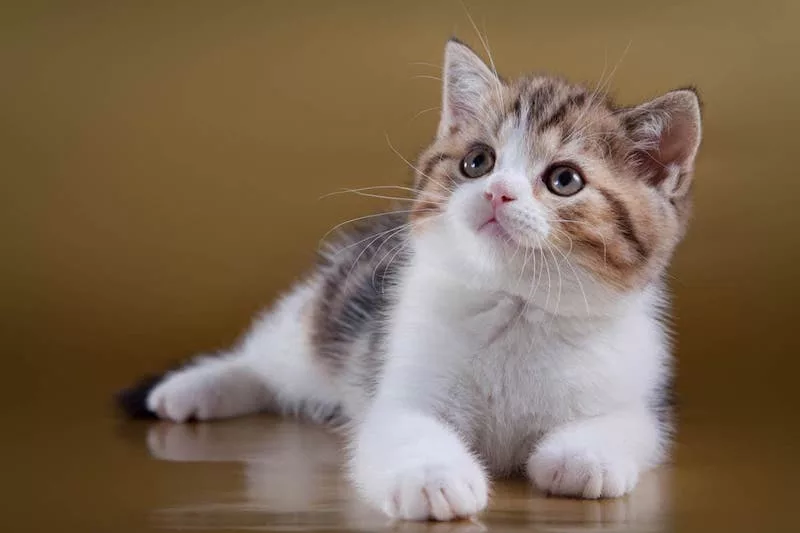

In [452]:
img2=cv2.imread('/content/5-Free-Cat-Food-Samples-For-Your-Feline-Friend-jpg.webp')
cv2_imshow(img2)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
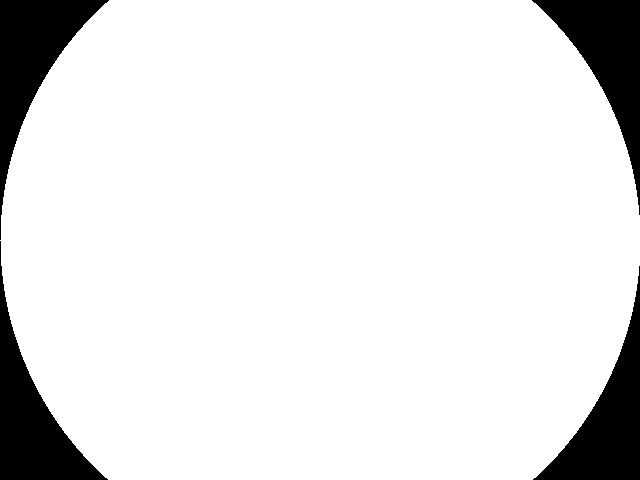

In [453]:
mask2 = np.zeros(img.shape[:2], dtype="uint8")
cv2.circle(mask2, (img.shape[1]//2, img.shape[0]//2), max(img.shape[:2])//2, 255, -1)

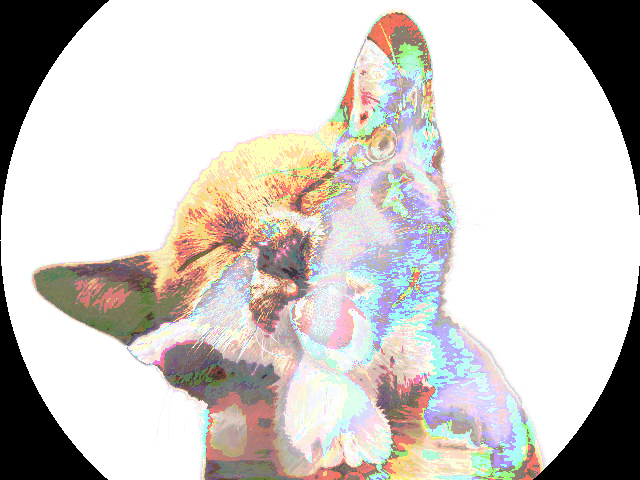

In [454]:
img2_resized = cv2.resize(img2, (img.shape[1], img.shape[0]))
masked2 = cv2.bitwise_or(img, img2_resized, mask=mask2)
cv2_imshow(masked2)

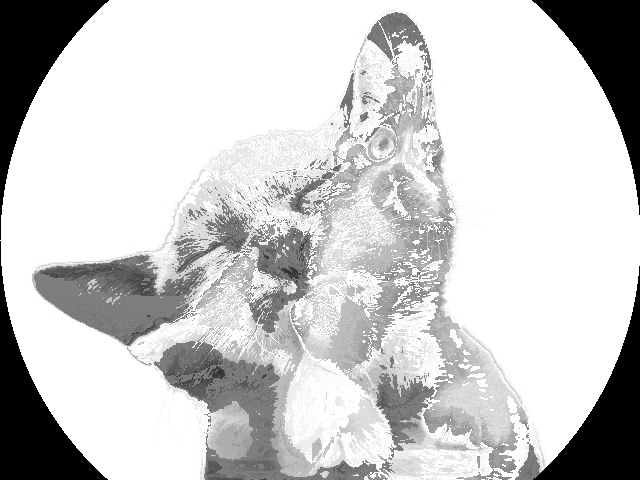

In [455]:
img2_resized = cv2.resize(img2, (img.shape[1], img.shape[0]))
masked3 = cv2.bitwise_or(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), cv2.cvtColor(img2_resized, cv2.COLOR_BGR2GRAY), mask=mask2)
cv2_imshow(masked3)

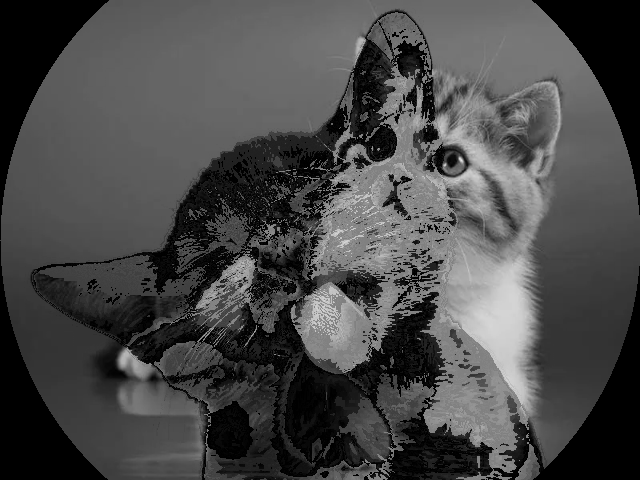

In [456]:
img2_resized = cv2.resize(img2, (img.shape[1], img.shape[0]))
masked4 = cv2.bitwise_and(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), cv2.cvtColor(img2_resized, cv2.COLOR_BGR2GRAY), mask=mask2)
cv2_imshow(masked4)

## Contours & Shape Detection

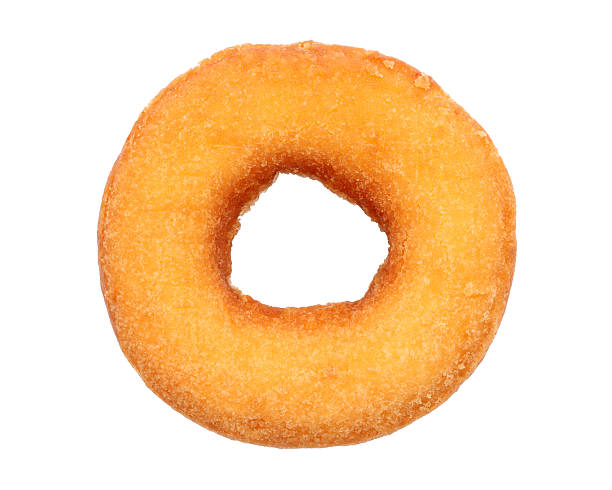

In [457]:
img=cv2.imread('/content/istockphoto-457409737-612x612.jpg')
cv2_imshow(img)

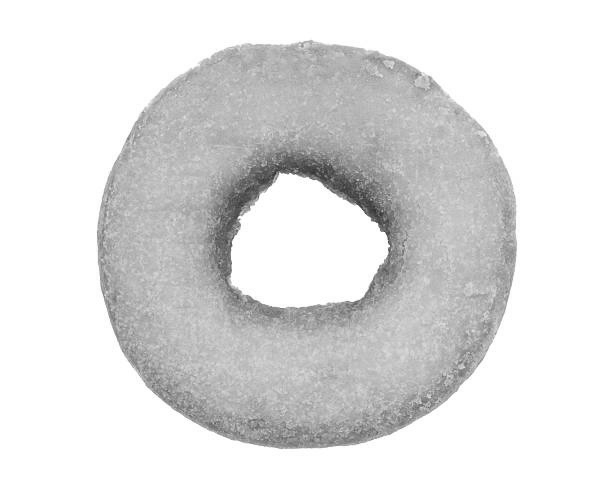

In [458]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

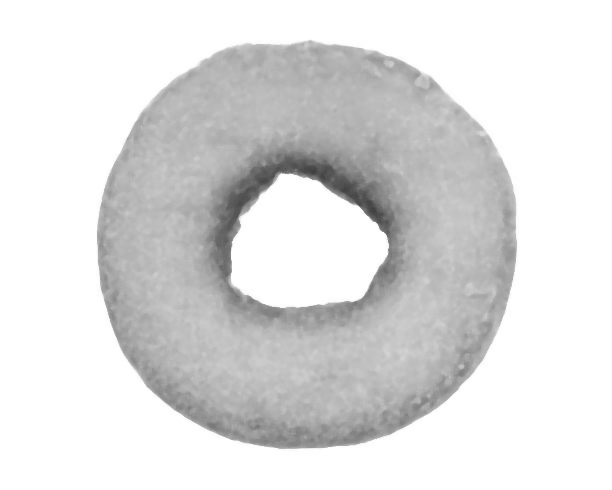

In [459]:
blurred=cv2.medianBlur(gray,5)
cv2_imshow(blurred)

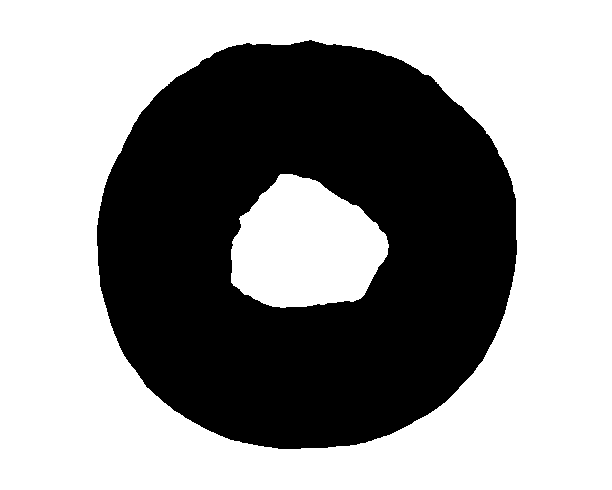

In [460]:
ret, thresh = cv2.threshold(blurred, 220, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)

In [461]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [462]:
contours[0]

array([[[  0,   0]],

       [[  0, 489]],

       [[611, 489]],

       [[611,   0]]], dtype=int32)

In [463]:
print(len(contours))   # how many contours were found

3


In [464]:
# draw contor draws on the same image
img_copy = img.copy()
img2_copy = img.copy()

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]], dtype=uint8)
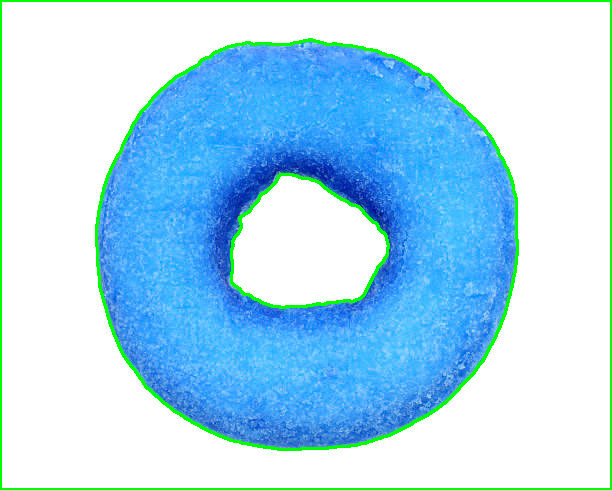

In [465]:
cv2.drawContours(img, contours, -1 , (0,255,0), 2)

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]], dtype=uint8)
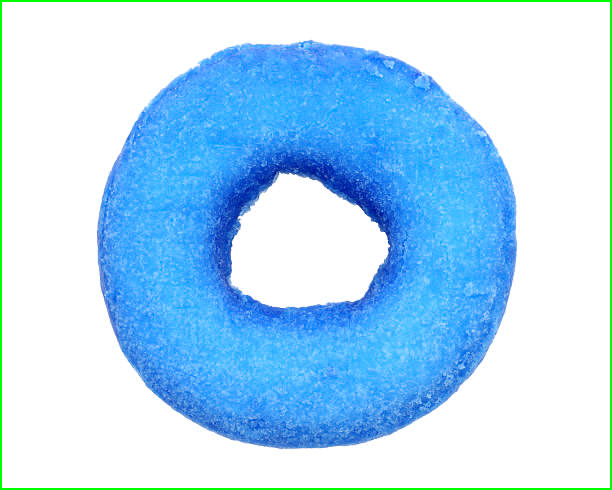

In [466]:
contours2, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img_copy, contours2, -1, (0,255,0), 2)

In [467]:
print(len(contours2))

1


array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]], dtype=uint8)
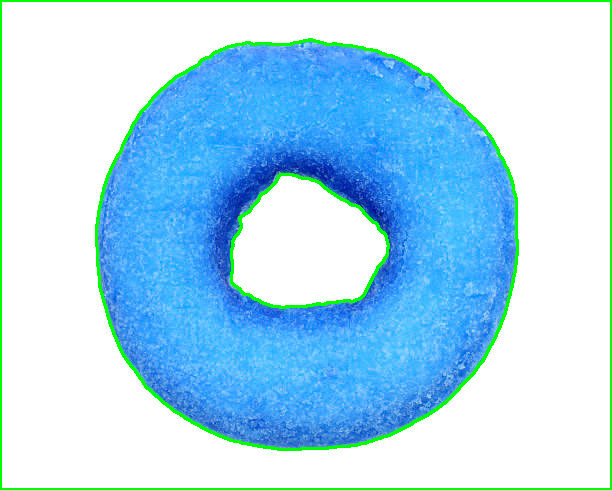

In [468]:
contours2, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img2_copy, contours2, -1, (0,255,0), 2)

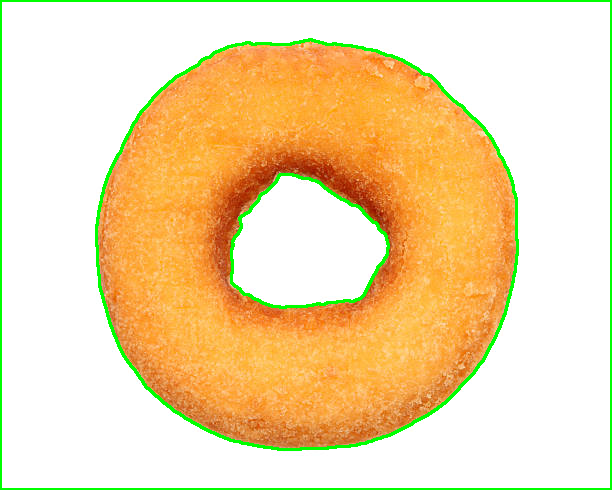

In [469]:
cv2_imshow(img2_copy)

drawing doesn’t show hierarchy. You have to print hierarchy to notice the difference.

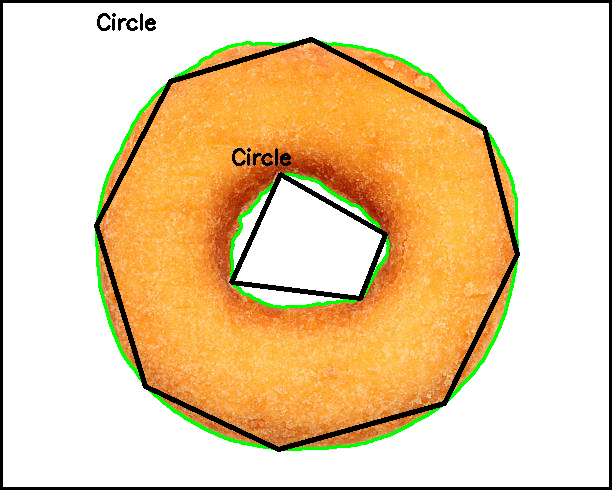

In [470]:
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.04*cv2.arcLength(cnt, True), True)
    x,y,w,h = cv2.boundingRect(approx)

    if len(approx) == 3:
        shape = "Triangle"
    elif len(approx) > 3:
        shape = "Circle"
    else:
        shape = "Other"

    # draw contour + label
    cv2.drawContours(img, [approx], 0, (0,0,0), 3)   # black outline
    cv2.putText(img, shape, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX,
                0.7, (0,0,0), 2)

cv2_imshow(img)

In [471]:
print(len(contours))

3


In [472]:
contours[0] #outer rectangle

array([[[  0,   0]],

       [[  0, 489]],

       [[611, 489]],

       [[611,   0]]], dtype=int32)

In [473]:
contours[1].shape

(591, 1, 2)

In [474]:
approx = cv2.approxPolyDP(contours[1], 0.04*cv2.arcLength(cnt, True), True)
print(len(approx)) #9points hence outer circle

9


In [475]:
contours[2].shape

(207, 1, 2)

In [476]:
approx = cv2.approxPolyDP(contours[2], 0.04*cv2.arcLength(cnt, True), True)
print(approx) #4points hence inner circle

[[[280 174]]

 [[231 282]]

 [[360 298]]

 [[385 234]]]


### Shape detection

Contours represent object boundaries. approxPolyDP simplifies these boundaries into corner points. Counting corners lets you infer the shape (triangle, quadrilateral, circle, etc.). Bounding rectangles help position labels, and drawing shows the detected shape on the image.

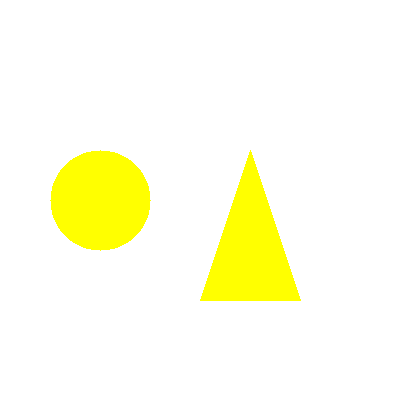

In [477]:
# blank white image
img = np.ones((400,400,3), dtype="uint8") * 255

# draw a yellow circle
cv2.circle(img, (100,200), 50, (0,255,255), -1)   # (B,G,R) = (0,255,255) is yellow

# draw a yellow triangle
pts = np.array([[250,150],[200,300],[300,300]], np.int32)
pts = pts.reshape((-1,1,2))
cv2.fillPoly(img, [pts], (0,255,255))   # filled yellow triangle

cv2_imshow(img)

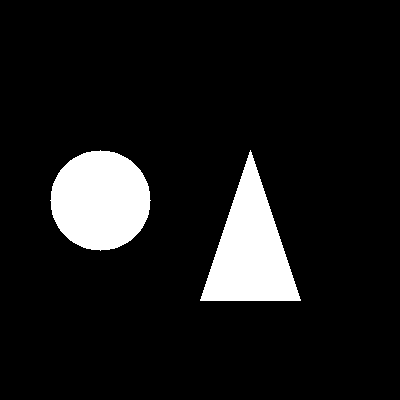

In [478]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(thresh)

In [479]:
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

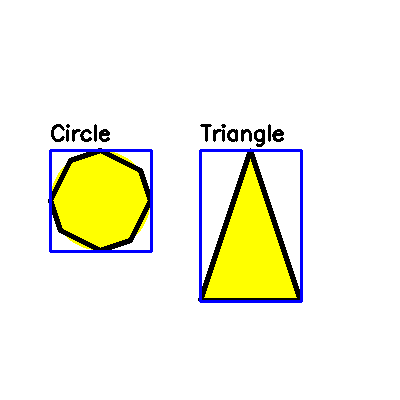

In [480]:
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.04*cv2.arcLength(cnt, True), True)
    x,y,w,h = cv2.boundingRect(approx)

    if len(approx) == 3:
        shape = "Triangle"
    elif len(approx) > 5:
        shape = "Circle"
    else:
        shape = "Other"

    # draw contour + label
    cv2.drawContours(img, [approx], 0, (0,0,0), 3)   # black outline
    cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)  # blue rectangle
    cv2.putText(img, shape, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX,
                0.7, (0,0,0), 2)

cv2_imshow(img)

### Corner detection
Harris Corner Detection in OpenCV identifies corners in an image by analyzing intensity variations in different directions. Corners are regions exhibiting significant changes in intensity when moved in both X and Y directions.

    Harris = "apply gradients (kernels) → build matrix → do math (eigenvalue-ish) → find corners."

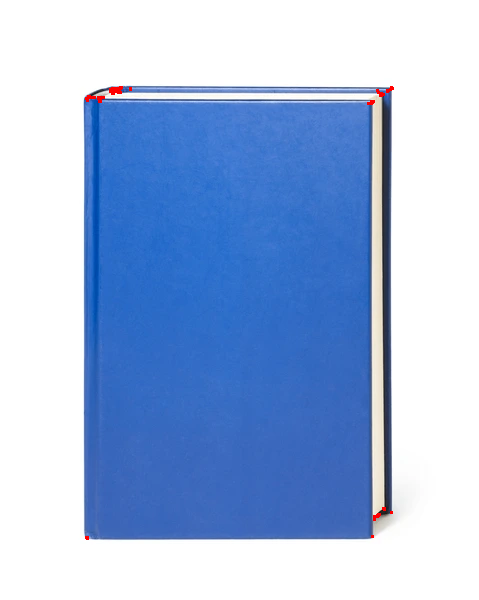

In [482]:
img = cv2.imread('/content/blue-book-isolated-on-white-600nw-2179864007.webp')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Convert to float32 for cornerHarris
gray = np.float32(gray)

# Apply Harris Corner Detection
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Dilate the result to mark corners clearly (optional)
dst = cv2.dilate(dst, None)

# Threshold for an optimal value, marking corners in red
img[dst > 0.01 * dst.max()] = [0, 0, 255]

cv2_imshow(img)

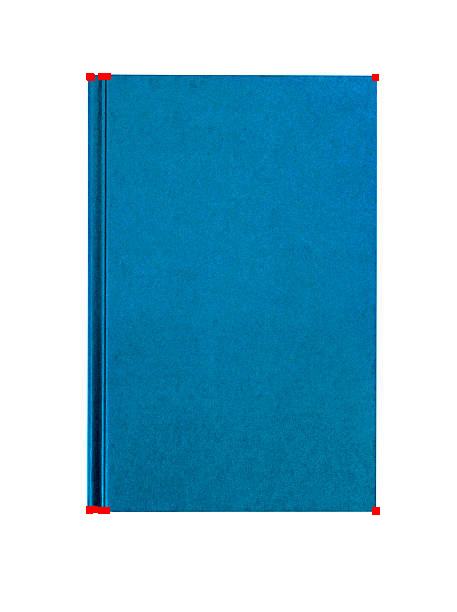

In [489]:
img2 = cv2.imread('/content/istockphoto-508090986-612x612.jpg')
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Convert to float32 for cornerHarris
gray = np.float32(gray)

# Apply Harris Corner Detection
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Dilate the result to mark corners clearly (optional)
dst = cv2.dilate(dst, None, iterations=3)

# Threshold for an optimal value, marking corners in red
img2[dst > 0.01 * dst.max()] = [0, 0, 255]

cv2_imshow(img2)

### SIFT = Scale-Invariant Feature Transform.

- It finds keypoints in an image that are stable (don’t change much) even if you:

  - zoom in/out (scale change),

  - rotate the image,

  - slightly change brightness or viewpoint.

- And for each keypoint, it creates a descriptor, a small vector (128 numbers) that describes the local texture around that point.

Example: if you have two photos of the same building, SIFT can find corners/windows in both, describe them, and let you match them even if one photo is zoomed or rotated.

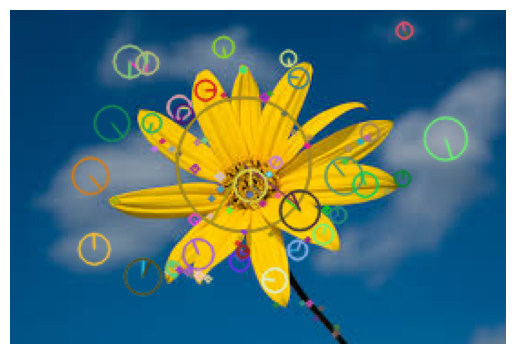

In [495]:
import matplotlib.pyplot as plt

img = cv2.imread("/content/images.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
kp, des = sift.detectAndCompute(gray, None)

# Draw keypoints
img_kp = cv2.drawKeypoints(img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(cv2.cvtColor(img_kp, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

SIFT is being used to find stable keypoints in the original image and in its rotated version.
The point is to show that even after rotation, SIFT marks the same corners and textures, proving why it’s useful for tasks like matching objects across different views.

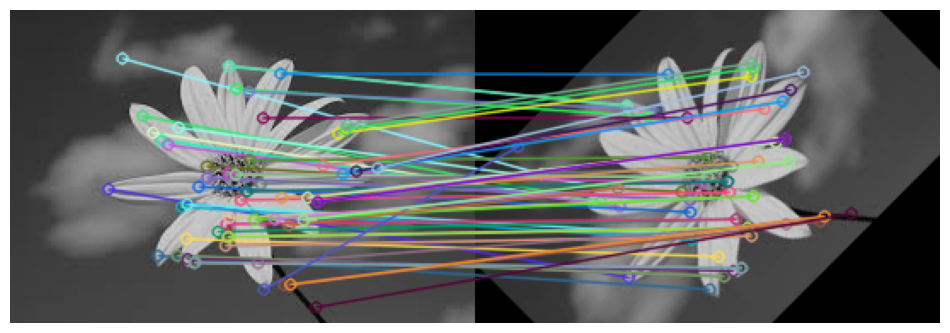

In [499]:
# Load grayscale image
img = cv2.imread(cv2.samples.findFile("/content/images.jpg"), cv2.IMREAD_GRAYSCALE)

# Rotate the image by 45 degrees
(h, w) = img.shape
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(img, M, (w, h))

# Create SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints + descriptors in both images
kp1, des1 = sift.detectAndCompute(img, None)
kp2, des2 = sift.detectAndCompute(rotated, None)

# Match features
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Lowe’s ratio test
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])

# Draw matches
matched_img = cv2.drawMatchesKnn(img, kp1, rotated, kp2, good, None,
                                 flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(12,6))
plt.imshow(matched_img, cmap="gray")
plt.axis("off")
plt.show()